In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
from tqdm import tqdm
import pandas as pd

In [8]:
df = pd.read_csv("b_a_butterworth_orden4.csv", header=None, names=["b", "a"])
b = df["b"].dropna().values
a = df["a"].dropna().values
df.head()

,b,a
0,0.167179,1.000000e+00
1,0.000000,-1.110223e-15
2,-0.668717,-7.820952e-01
3,0.000000,6.106227e-16
4,1.003076,6.799785e-01


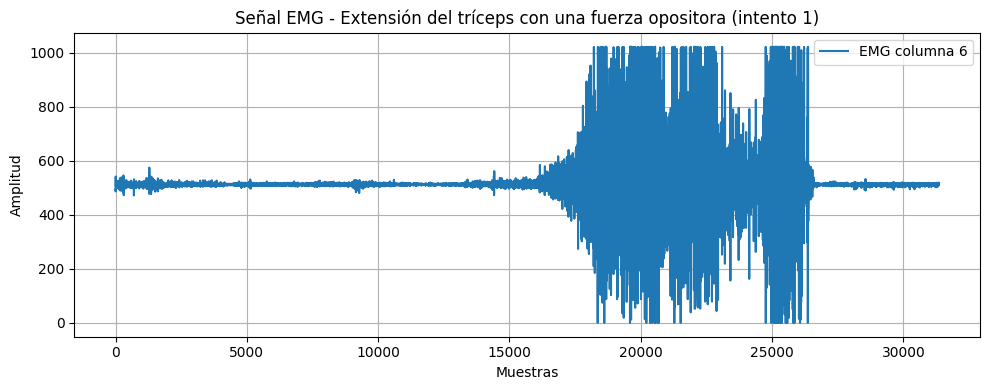

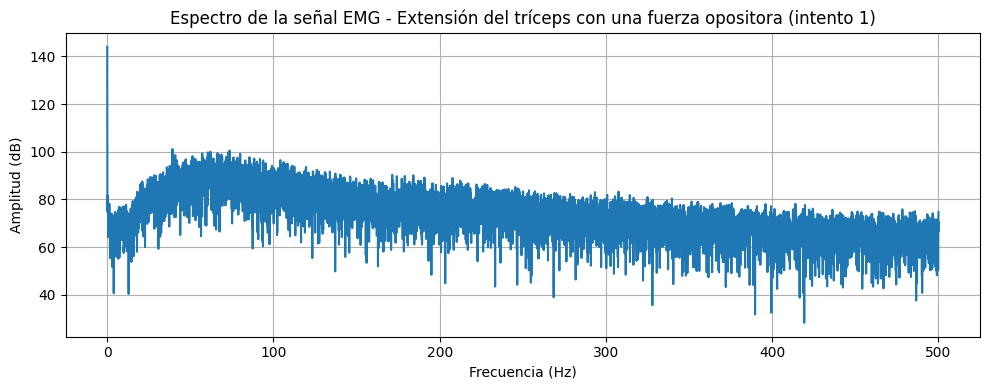

In [9]:
# Cargar todo el archivo
data = np.loadtxt("EMG-T_01_MOV2.txt")

# Extraer solo la columna 6 (índice 5)
emg_signal = data[:, 5]

# Graficar la señal
plt.figure(figsize=(10,4))
plt.plot(emg_signal, label="EMG columna 6")
plt.title("Señal EMG - Extensión del tríceps con una fuerza opositora (intento 1)")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Parámetros de muestreo
fs = 1000  # Hz (ajusta según tu adquisición)

# FFT
n = len(emg_signal)
frequencies1 = np.fft.rfftfreq(n, d=1/fs)
spectrum1 = np.abs(np.fft.rfft(emg_signal))

# Conversión a decibelios
spectrum_db_1 = 20 * np.log10(spectrum1 + 1e-12)  # 1e-12 evita log(0)

# Graficar en dB
plt.figure(figsize=(10, 4))
plt.plot(frequencies1, spectrum_db_1)
plt.title("Espectro de la señal EMG - Extensión del tríceps con una fuerza opositora (intento 1)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud (dB)")
plt.grid(True)
plt.tight_layout()
plt.show()

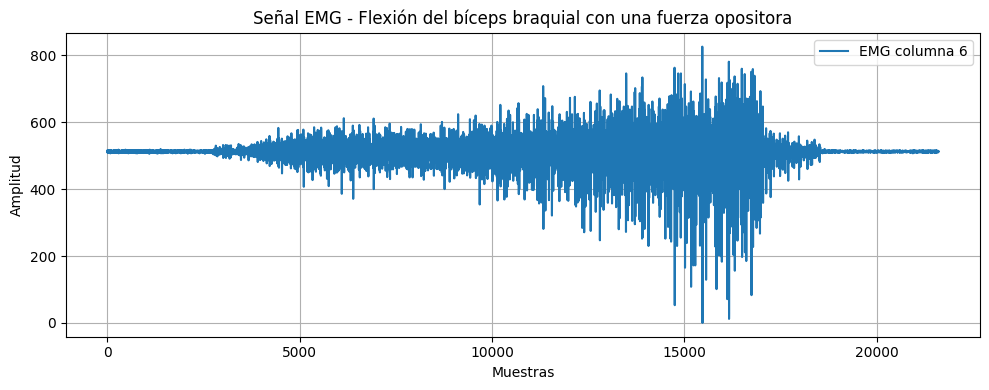

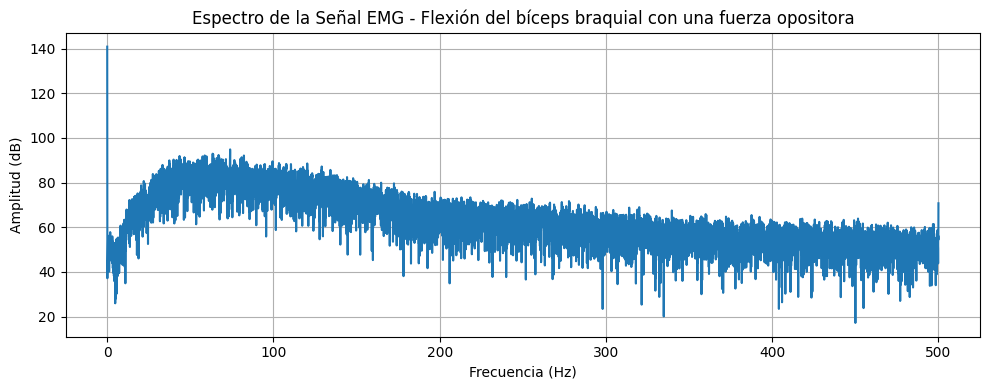

In [10]:
# Cargar todo el archivo 2
data = np.loadtxt("EMG_02_MOV2.txt")

# Extraer solo la columna 6 (índice 5)
emg_signal_2 = data[:, 5]

# Graficar la señal
plt.figure(figsize=(10,4))
plt.plot(emg_signal_2, label="EMG columna 6")
plt.title("Señal EMG - Flexión del bíceps braquial con una fuerza opositora")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Parámetros de muestreo
fs = 1000  # Hz (ajusta según tu adquisición)

# FFT
n = len(emg_signal_2)
frequencies = np.fft.rfftfreq(n, d=1/fs)
spectrum = np.abs(np.fft.rfft(emg_signal_2))

# Conversión a decibelios
spectrum_db = 20 * np.log10(spectrum + 1e-12)  # 1e-12 evita log(0)

# Graficar en dB
plt.figure(figsize=(10, 4))
plt.plot(frequencies, spectrum_db)
plt.title("Espectro de la Señal EMG - Flexión del bíceps braquial con una fuerza opositora")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud (dB)")
plt.grid(True)
plt.tight_layout()
plt.show()


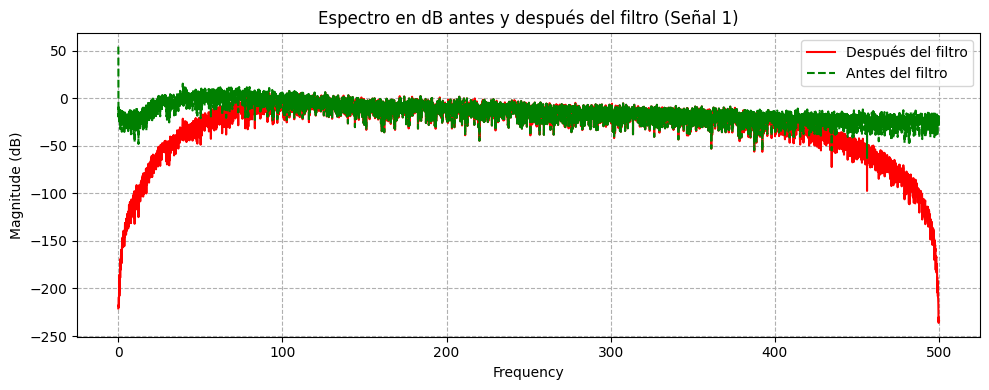

In [11]:
#Señal 1 en dB
y1 = lfilter(b, a, emg_signal)

# Espectros en dB
plt.figure(figsize=(10,4))
plt.magnitude_spectrum(y1, Fs=1000, scale='dB', color="red", label="Después del filtro")
plt.magnitude_spectrum(emg_signal, Fs=1000, scale='dB', color="green", ls="--", label="Antes del filtro")

plt.legend()
plt.grid(True, ls="--")
plt.title("Espectro en dB antes y después del filtro (Señal 1)")
plt.tight_layout()
plt.show()



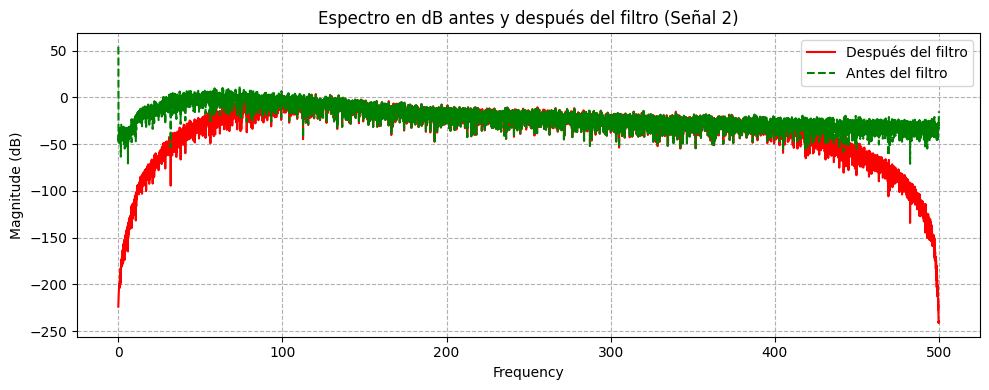

In [12]:
# Señal 2 filtrada
y2 = lfilter(b, a, emg_signal_2)

# Espectros en dB
plt.figure(figsize=(10,4))
plt.magnitude_spectrum(y2, Fs=1000, scale='dB',color="red", label="Después del filtro")
plt.magnitude_spectrum(emg_signal_2, Fs=1000, scale='dB', color="green", ls="--", label="Antes del filtro")

plt.legend()
plt.grid(True, ls="--")
plt.title("Espectro en dB antes y después del filtro (Señal 2)")
plt.tight_layout()
plt.show()
